In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
import sklearn

In [4]:
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
filename="G:/My Drive/Python/course/pima-indians-diabetes.data.csv"
Data=pd.read_csv(filename,delimiter=',',names=names)

In [5]:
Data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
Data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
Data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [8]:
Data['class'].unique()

array([1, 0], dtype=int64)

In [9]:
Data.shape

(768, 9)

In [10]:
Data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Descriptive Statistics

In [11]:
Data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
Data['preg'].mean()

3.8450520833333335

In [13]:
Data['preg'].agg([min,len,max])

min      0
len    768
max     17
Name: preg, dtype: int64

In [14]:
Data.preg.std()

3.3695780626988623

In [15]:
from pandas import set_option
set_option('display.width',100)
set_option('precision',3)

In [16]:
Data.groupby(['class']).size()

class
0    500
1    268
dtype: int64

In [17]:
correlation=Data.corr(method='pearson')
print(correlation)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


Skewness: Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame

In [18]:
skew=Data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


Understand the data with visualization

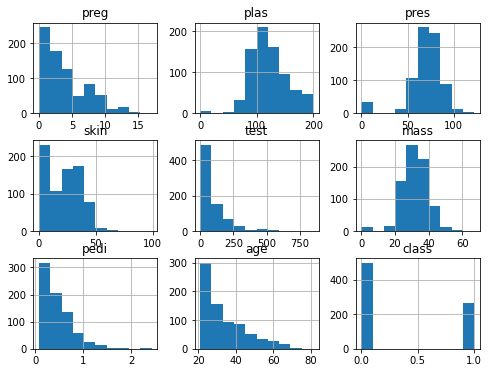

In [19]:
#univariate plot
Data.hist()
plt.show()

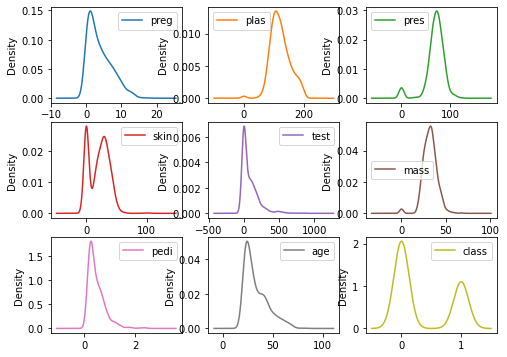

In [20]:
Data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

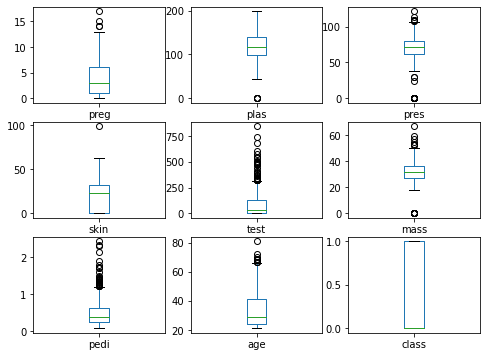

In [21]:

Data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

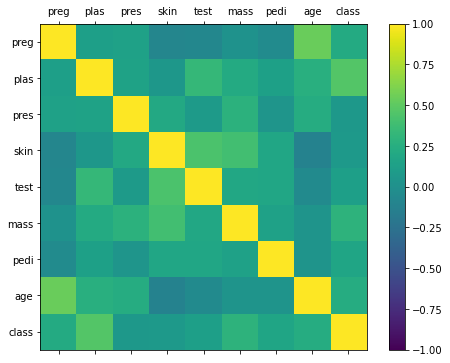

In [22]:
correlations = Data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

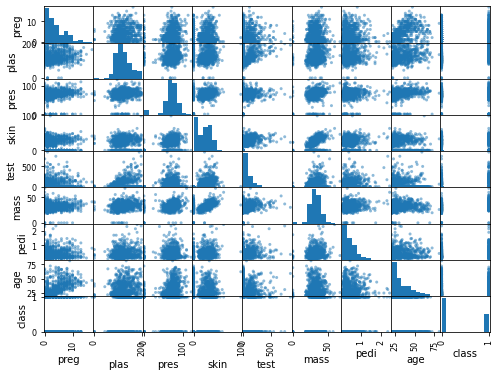

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(Data)
plt.show()

In [24]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array=Data.values
X=array[:,0:8]
Y=array[:,8]
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
print(rescaledX)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [25]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
print(rescaledX[:,:4])

[[ 0.63994726  0.84832379  0.14964075  0.90726993]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221]
 ...
 [ 0.3429808   0.00330087  0.14964075  0.15453319]
 [-0.84488505  0.1597866  -0.47073225 -1.28821221]
 [-0.84488505 -0.8730192   0.04624525  0.65635768]]


In [26]:
scaler=Normalizer().fit(X)
rescaledX=scaler.transform(X)
print(rescaledX[:4,:])

[[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]]


In [27]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.0).fit(X)
binaryX=binarizer.transform(X)
print(binaryX[:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of different statistical tests to select a specific number of features. The example
below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best
features from the Pima Indians onset of diabetes dataset.

In [28]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(X,Y)
print(fit.scores_)
features=fit.transform(X)
features

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [32]:
X.shape

(768, 8)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
rfe=RFE(model,3)
fit=rfe.fit(X,Y)
print("Num features: {}".format(fit.n_features_))
print("Selected features:{}".format(fit.support_))
print("feature ranksing: {}".format(fit.ranking_))

Num features: 3
Selected features:[ True False False False False  True  True False]
feature ranksing: [1 2 4 5 6 1 1 3]


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
fit=pca.fit(X)
print("% explained variations: {}",format(fit.explained_variance_ratio_))
print(fit.components_)

% explained variations: {} [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.0832313  0.24834946 0.0873412  0.06743011 0.07066815 0.1694963
 0.12882213 0.14466133]


In [31]:
#data spliting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
test_size=.3
seed=7
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,
                                               random_state=seed)
model=LogisticRegression()
model.fit(X_train,Y_train)
result=model.score(X_test,Y_test)
print("accuracy is {}".format(result*100))

accuracy is 74.89177489177489


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
from sklearn.model_selection import cross_val_score, KFold
num_folds=3
seed=7
kfold=KFold(n_splits=num_folds, random_state=seed)
model=LogisticRegression()
results=cross_val_score(model,X,Y,cv=kfold)
print("accuracy of mean is  {} and std is {}".format(results.mean(),results.std()*100))

accuracy of mean is  0.7734375 and std is 3.0425316264447715


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed 

In [33]:
results.std()


0.030425316264447715

In [34]:
scoring='accuracy'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print("accuracy of mean is  {} and std is {}".format(results.mean(),results.std()))

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy of mean is  0.7734375 and std is 0.030425316264447715


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [35]:
scoring='neg_log_loss'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print("accuracy of mean is  {} and std is {}".format(results.mean(),results.std()))

accuracy of mean is  -0.49287854039102436 and std is 0.04191306114903471


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [36]:
scoring='roc_auc'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print("accuracy of mean is  {} and std is {}".format(results.mean(),results.std()))

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

accuracy of mean is  0.8278728627836309 and std is 0.039696030145832735


In [37]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print(matrix)

[[127  20]
 [ 38  46]]


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
from sklearn.metrics import classification_report
report=classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       147
         1.0       0.70      0.55      0.61        84

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



In [39]:
result=precision_recall_fscore_support(Y_test,predicted)
print(result)

(array([0.76969697, 0.6969697 ]), array([0.86394558, 0.54761905]), array([0.81410256, 0.61333333]), array([147,  84], dtype=int64))


In [40]:
scoring='neg_mean_absolute_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print("accuracy of mean is  {} and std is {}".format(results.mean(),results.std()))

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

accuracy of mean is  -0.2265625 and std is 0.030425316264447715


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
from sklearn.linear_model import LogisticRegression
num_folds=3
scoring='accuracy'
kfold=KFold(n_splits=10,random_state=7)
model=LogisticRegression()
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())
print(results.std())

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed 

0.773427887901572
0.055238035103343436


In [42]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())
print(results.std())

0.7265550239234451
0.06182131406705549


In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6900546821599454


In [45]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7604237867395763


In [46]:
#X1=Data.values[:,0:5]
#Y1=Data.values[5]
#from sklearn.preprocessing import StandardScaler
#scale=StandardScaler().fit(X1)
#rescaledX=scale.transform(X1)
#rescaledX

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
kfold=KFold(n_splits=5,random_state=7)
results=cross_val_score(model,rescaledX,Y,cv=kfold,scoring='neg_mean_squared_error')
print(results.mean())

-0.21441506515025396


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [49]:
array = Data.values
X = array[:,0:8]
Y = array[:,8]

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

for the LR model the mean error is 0.7735166793990323 with std 0.034787393425522124
for the KNN model the mean error is 0.723979288685171 with std 0.025389734794299377
for the CART model the mean error is 0.7123673711909005 with std 0.057472816141503145
for the NB model the mean error is 0.7526610644257703 with std 0.028957732924929033
for the SVM model the mean error is 0.753968253968254 with std 0.04067000970642327


AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

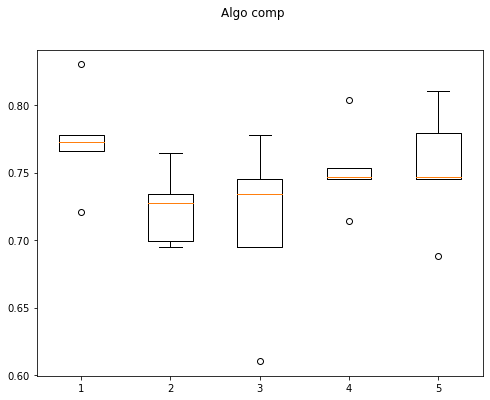

In [54]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('for the {} model the mean error is {} with std {}'.format(name,cv_results.mean(),cv_results.std()))
fig=plt.figure()
fig.suptitle('Algo comp')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.xticklabels(names)
plt.show()


In [58]:
from sklearn.pipeline import Pipeline
estimator=[]
estimator.append(('standardize',StandardScaler()))
estimator.append(('LR',LinearRegression()))
model=Pipeline(estimator)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.276064800525974


In [59]:
from sklearn.pipeline import FeatureUnion
features=[]
features.append(('stdardization',StandardScaler()))
features.append(('select_best',SelectKBest(k=5)))
features_union=FeatureUnion(features)
estimator=[]
estimator.append(('FU',features_union))
estimator.append(('LG',LogisticRegression()))
model=Pipeline(estimator)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7722094898565487


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [60]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(bootstrap=True,max_depth=5,max_features=4,
                        max_samples=10,criterion='gini',n_estimators=10,verbose=1)

In [62]:
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.711060181648417


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [63]:
from sklearn.ensemble import VotingClassifier
model1=LogisticRegression()
model2=SVC()
model3=DecisionTreeClassifier()
estimators=[]
estimators.append(('LR',model1))
estimators.append(('SVM',model2))
estimators.append(('cart',model3))
ensemble=VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

0.7787029963500551


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lars
model=Ridge()
alphas=np.array([1,.1,.01,.001,.0001,.00001])
param_grid=dict(alpha=alphas)
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27610844129292444
1.0


In [79]:
from scipy.stats import uniform 
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.2761075573402854
0.9779895119966027


In [80]:
from pickle import load, dump
model = LogisticRegression()
model.fit(X_train, Y_train)
filename='test_model'
dump(model,open(filename,'wb'))
loadded_model=load(open(filename,'rb'))
results=loadded_model.score(X_test,Y_test)
print(results)

0.7489177489177489


C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
